06.2022

**Jan Miksa**

**US Used Cars Market Machine Learning Project**

Based on: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

# **I. Basic Data Preparation**

## A. Loading

In [228]:
import numpy as np
import pandas as pd 

In [229]:
#importing data from CSV

dataframe = pd.read_csv('vehicles.csv')

print(dataframe.shape)
dataframe.head(10)

(426880, 26)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [230]:
#constructing dataframe with column descriptions based on what is found on kaggle
#name - dtype - first value - null percent - desc

desc = ['entry ID', 'listing URL', 'craigslist region', 'region URL', 'entry price', 'entry year', 'manufacturer of vehicle', 'model of vehicle', 'condition of vehicle', 'number of cylinders', 'fuel type', 'miles traveled by vehicle', 'title status of vehicle', 'transmission of vehicle', 'vehicle identification number', 'type of drive', 'size of vehicle', 'generic type of vehicle', 'color of vehicle', 'image URL', 'listed description of vehicle', 'useless column left in by mistake', 'state of listing', 'latitude of listing', 'longitude of listing', 'posting date']

dataframe_desc = pd.DataFrame(dataframe.dtypes, columns=['dtype'])
dataframe_desc = dataframe_desc.reset_index()

dataframe_desc['name'] = dataframe_desc['index']
dataframe_desc['first value'] = [ dataframe[name][0] for name in dataframe_desc['name']]
dataframe_desc['null percent'] = [ round(dataframe[name].isna().mean()*100, 1) for name in dataframe_desc['name']]
dataframe_desc['desc'] = desc

dataframe_desc = dataframe_desc[['name','dtype','first value','null percent','desc']]
dataframe_desc

,name,dtype,first value,null percent,desc
0,id,int64,7222695916,0.0,entry ID
1,url,object,https://prescott.craigslist.org/cto/d/prescott...,0.0,listing URL
2,region,object,prescott,0.0,craigslist region
3,region_url,object,https://prescott.craigslist.org,0.0,region URL
4,price,int64,6000,0.0,entry price
5,year,float64,NaN,0.3,entry year
6,manufacturer,object,NaN,4.1,manufacturer of vehicle
7,model,object,NaN,1.2,model of vehicle
8,condition,object,NaN,40.8,condition of vehicle
9,cylinders,object,NaN,41.6,number of cylinders


## B. Preprocessing

In [231]:
#dropping columns that are not adequate for this project:
# - id - id on craigslist, nothing to do with car
# - url
# - region - already have state
# - region_url
# - size - too much null values
# - county
# - lat - nothing to do with car
# - long - nothing to do with car

#left posting_date to adjust price for inflation to 2022(data is from 2021)
#left image_url & description because they may be interesting later

dataframe = dataframe.drop(['id', 'url', 'region', 'region_url', 'size', 'county', 'lat', 'long'], axis=1)

In [232]:
print(dataframe.shape)
dataframe.head(10)

(426880, 18)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,type,paint_color,image_url,description,state,posting_date
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN


### VIN

What about VIN column?

Based on: https://en.wikipedia.org/wiki/Vehicle_identification_number

Apart from "World Manufacturer Identifier" and "Model Year Encoding" most parts of a VIN number are highly dependent on manufacturer/model of a vehicle and are not easy to extract without a big database of encodings used by different manufactutrers in different models. Also there are a lot of different WMIs dependent not only on manufacturing company, but also where the factory is.

The only value that we can extract with relative ease is model year and we will do just that.

In [233]:
count = sum((~dataframe['VIN'].isna() & dataframe['year'].isna()))
print(count)

1137


As we can see there are 1137 rows that have VIN but no year. Let's fix this - fill this missing data from VIN and then drop VIN column as it won't be needed later.

In [234]:
yearcodes_old = {'A':1980, 'B':1981, 'C':1982, 'D':1983, 'E':1984, 'F':1985, 'G':1986, 'H':1987, 'J':1988, 'K':1989, 'L':1990, 'M':1991, 'N':1992, 'P':1993, 'R':1994, 'S':1995, 'T':1996, 'V':1997, 'W':1998, 'X':1999, 'Y':2000, '1':2001, '2':2002, '3':2003, '4':2004, '5':2005, '6':2006, '7':2007, '8':2008, '9':2009}
yearcodes_new = {'A':2010, 'B':2011, 'C':2012, 'D':2013, 'E':2014, 'F':2015, 'G':2016, 'H':2017, 'J':2018, 'K':2019, 'L':2020, 'M':2021, 'N':2022, 'P':2023}

for i, row in dataframe[~dataframe['VIN'].isna()].iterrows():
    if (row.isna()['year']):
        vin = row['VIN']
        try:
            dataframe.at[i, 'year'] = (yearcodes_old[vin[9]] if vin[6].isnumeric() else yearcodes_new[vin[9]])
        except:
            print('VIN decoding error')
            dataframe.drop(i, inplace=True)   #dropping where VIN couldn't be decoded

VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error
VIN decoding error


In [235]:
count = sum((~dataframe['VIN'].isna() & dataframe['year'].isna()))
print(count)

0


In [236]:
dataframe = dataframe.drop(['VIN'], axis=1)

### Adjust price for inflation

Adjusting price for inflation.

Here we adjust all the prices to 2022 dollar value so they can be compared.

This is done using: https://github.com/palewire/cpi

In [237]:
#dropping rows without:
# - posting_date - needed for inflation adjustment
# - price - one of targets

dataframe.dropna(subset=['posting_date', 'price'], inplace=True)

In [238]:
#change posting_date to posting_year, posting_month & posting_day
dataframe['posting_year'] = dataframe['posting_date'].map(lambda x: int(x.split('-')[0]))
dataframe['posting_month'] = dataframe['posting_date'].map(lambda x: int(x.split('-')[1]))
dataframe['posting_day'] = dataframe['posting_date'].map(lambda x: int(x.split('-')[2][:2]))

#check if months & days are reversed
print(max(dataframe['posting_day']))
print(max(dataframe['posting_month']))

dataframe = dataframe.drop(['posting_date'],axis=1)

30
5


In [239]:
import cpi
cpi.update()
dataframe.apply(lambda x: cpi.inflate(x['price'], x['posting_year']), axis=1)

#dropping posting year as all data is from 2021
dataframe = dataframe.drop(['posting_year'],axis=1)

In [240]:
print(dataframe.shape)
dataframe.head(10)

(426800, 18)


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,image_url,description,state,posting_month,posting_day
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,5,4
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,5,4
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,5,4
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,5,4
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,5,3
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,https://images.craigslist.org/00V0V_ftJbKrOgdi...,Carvana is the safer way to buy a car During t...,al,5,3
33,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,https://images.craigslist.org/00E0E_iKN07Sh7ou...,Carvana is the safer way to buy a car During t...,al,5,3
34,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,https://images.craigslist.org/00101_dXoZTH7iVm...,Selling my 2019 Toyota Tacoma TRD Off Road Dou...,al,5,3
35,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,al,5,3
36,38590,2011.0,chevrolet,corvette grand sport,good,8 cylinders,gas,30237.0,clean,other,rwd,other,red,https://images.craigslist.org/00U0U_kKYnS1LWh8...,Carvana is the safer way to buy a car During t...,al,5,3


### Columns

Now let's take a closer look at values inside columns.

First let's see for each column how many empty values and unique values it has.

In [241]:
dataframe_col_stats = pd.DataFrame(dataframe.columns, columns=['name'])
dataframe_col_stats['empty'] = [sum(dataframe[name].isna()) for name in dataframe_col_stats['name']]
dataframe_col_stats['empty percent'] = [round(dataframe[name].isna().mean()*100, 1) for name in dataframe_col_stats['name']]
dataframe_col_stats['unique'] = [len(dataframe[name].unique()) for name in dataframe_col_stats['name']]
dataframe_col_stats

,name,empty,empty percent,unique
0,price,0,0.0,15652
1,year,0,0.0,114
2,manufacturer,17566,4.1,43
3,model,5209,1.2,29666
4,condition,174024,40.8,7
5,cylinders,177609,41.6,9
6,fuel,2944,0.7,6
7,odometer,4331,1.0,104871
8,title_status,8174,1.9,7
9,transmission,2488,0.6,4


First thing that can be easily spotted is the fact that columns: state, posting_month and posting_day are totally all right. No null values, 30 days in a monts, data collected over a span of 2 months ant there are 51 states in USA. Also image_url and description will be used for later models to deduce someting from images/text and they will construct two new, independent datasets so let's leave them for now.

Let's focus on columns 0-12 for now.

In [242]:
#price - ok no nulls & int type
#year - need to convert to int
print(dataframe['year'].unique())
dataframe['year'] = dataframe['year'].map(lambda x: int(x))
dataframe = dataframe.astype({'year':int})

[2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018. 2004.
 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998. 2002.
 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974. 1996.
 1987. 2000. 1955. 1960. 1991. 1972. 1988. 1994. 1929. 1984. 1986. 1989.
 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977. 1993.
 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980. 1967.
 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959. 1950.
 1930. 1956. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923. 1949.
 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915. 1945.
 1902. 1905. 1920. 1944. 1910. 1909.]


In [243]:
#manufacturer/model - very important columns, not a lot of empty values so let's drop rows without values in this row
size1 = dataframe.shape[0]
dataframe.dropna(subset=['manufacturer', 'model'], inplace=True)
size2 = dataframe.shape[0]

print("Data reduced by: ", (size1 - size2)*100/size1, "%", sep='')


Data reduced by: 5.335988753514527%


In [244]:
#odometer - also very important, drop empty & convert to int
dataframe.dropna(subset=['odometer'], inplace=True)
dataframe['odometer'] = dataframe['odometer'].map(lambda x: int(x))
dataframe = dataframe.astype({'odometer':int})
dataframe.dropna(subset=['odometer'], inplace=True)

In [245]:
#condition - let's encode it as numerical ordered data  property
print(dataframe['condition'].unique())
condition_enc = {'condition': {'salvage': int(-1), 'fair': int(0), 'good': int(1), 'excellent': int(2), 'like new': int(3), 'new': int(4)}}   #salvage - negative, fair - neutral, rest - positive

['good' 'excellent' 'fair' 'like new' 'new' nan 'salvage']


The only problem is that there is a lot of missing data in this column, but it can be really helpful because as we know car prices vary vastly depending on their state.
Let's assume that when a car is in a very bad/good state it would be mentioned in the offer and that state of the car is dependent on it's mileage.
Let's try to fill in some missing data - if a car's mileage/price is near mean and it has no condition let's set it to 'fair' and then delete the rest.
'title_status' may also help with condition because they somewhat overlap.

In [246]:
print(dataframe['title_status'].unique())

['clean' 'rebuilt' 'lien' nan 'salvage' 'missing' 'parts only']


As we can see values like 'clean' or 'rebuilt' indicate good condition while 'salvage', 'missing' and 'parts only' bad. So let's fill some 'condition' data based on these.

In [247]:
tr_dict = {'clean': 1, 'rebuilt': 3, 'salvage': -1, 'missing': -1, 'parts only': -1}
for i, row in dataframe[~dataframe['condition'].isna()].iterrows():
    if (~row.isna()['title_status'] and row['title_status'] != 'lien'):
        dataframe.at[i, 'condition'] = tr_dict[row['title_status']]

In [248]:
print(sum(dataframe['condition'].isna()))
print(round(dataframe['condition'].isna().mean()*100, 1))

#not a big change but still some :')

162089
40.5


In [249]:
model_pricemileage = {}
for i, row in dataframe.iterrows():
    if row['model'] in model_pricemileage:
        model_pricemileage[row['model']][0].append(row['price'])
        model_pricemileage[row['model']][1].append(row['odometer'])
    else:
        model_pricemileage[row['model']] = [[row['price']],[row['odometer']]]

model_avgpricemileage = {}
for key in model_pricemileage.keys():
    prices = model_pricemileage[key][0]
    mileages = model_pricemileage[key][1]
    model_avgpricemileage[key] = [sum(prices)/len(prices), sum(mileages)/len(mileages)]

In [250]:
#3% margin
for i, row in dataframe[dataframe['condition'].isna()].iterrows():
    model = row['model']
    if(row['price'] < 1.03*model_avgpricemileage[model][0] and row['price'] > 0.97*model_avgpricemileage[model][0]):
        if(row['odometer'] < 1.03*model_avgpricemileage[model][1] and row['odometer'] > 0.97*model_avgpricemileage[model][1]):
            dataframe.at[i, 'condition'] = 'fair'

In [251]:
print(sum(dataframe['condition'].isna()))
print(round(dataframe['condition'].isna().mean()*100, 1))

#a bit better :')

151458
37.9


In [252]:
dataframe.dropna(subset=['condition'], inplace=True)
dataframe = dataframe.replace(condition_enc)

In [253]:
#transmission -> delete missing & one hot encode
dataframe.dropna(subset=['transmission'], inplace=True)
print(dataframe['transmission'].unique())
dummy_df = pd.get_dummies(dataframe['transmission'], prefix='transmission_')
dataframe = pd.concat([dataframe, dummy_df], axis=1)
dataframe = dataframe.drop(['transmission'], axis=1)

['other' 'automatic' 'manual']


In [254]:
#title_status -> lien, missing, parts only as one hot, delete rest
dataframe.dropna(subset=['title_status'], inplace=True)
print(dataframe['title_status'].unique())
dummy_df = pd.get_dummies(dataframe['title_status'])
dataframe = pd.concat([dataframe, dummy_df], axis=1)
dataframe = dataframe.drop(['title_status'], axis=1)
dataframe = dataframe.drop(['clean'], axis=1)
dataframe = dataframe.drop(['rebuilt'], axis=1)
dataframe = dataframe.drop(['salvage'], axis=1)

['clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']


In [255]:
#fuel - very importnant, not a lot empty, drop empty, one hot encode
dataframe.dropna(subset=['fuel'], inplace=True)
print(dataframe['fuel'].unique())
dummy_df = pd.get_dummies(dataframe['fuel'])
dataframe = pd.concat([dataframe, dummy_df], axis=1)
dataframe = dataframe.drop(['fuel'], axis=1)

['gas' 'other' 'diesel' 'hybrid' 'electric']


In [256]:
#drive - very important, drop empty, one hot encode
dataframe.dropna(subset=['drive'], inplace=True)
print(dataframe['drive'].unique())
dummy_df = pd.get_dummies(dataframe['drive'])
dataframe = pd.concat([dataframe, dummy_df], axis=1)
dataframe = dataframe.drop(['drive'], axis=1)

['rwd' '4wd' 'fwd']


In [257]:
dataframe_col_stats = pd.DataFrame(dataframe.columns, columns=['name'])
dataframe_col_stats['empty'] = [sum(dataframe[name].isna()) for name in dataframe_col_stats['name']]
dataframe_col_stats['empty percent'] = [round(dataframe[name].isna().mean()*100, 1) for name in dataframe_col_stats['name']]
dataframe_col_stats['unique'] = [len(dataframe[name].unique()) for name in dataframe_col_stats['name']]
print(dataframe.shape)
dataframe_col_stats

(184380, 28)


,name,empty,empty percent,unique
0,price,0,0.0,7050
1,year,0,0.0,104
2,manufacturer,0,0.0,41
3,model,0,0.0,16909
4,condition,0,0.0,6
5,cylinders,38887,21.1,9
6,odometer,0,0.0,54251
7,type,17709,9.6,14
8,paint_color,27001,14.6,13
9,image_url,0,0.0,113047


Since all of the models in this project will probably be fitted on my computer I will have to reduce the size of this dataset either way. So deleting all data rows without type, cylinders or paint_color that can lead to interesting endevaours doesn't seem so bad.

In [258]:
#paint_color
dataframe.dropna(subset=['paint_color'], inplace=True)
print(dataframe['paint_color'].unique())

['black' 'silver' 'grey' 'red' 'blue' 'white' 'brown' 'yellow' 'green'
 'orange' 'custom' 'purple']


In [259]:
#type
dataframe.dropna(subset=['type'], inplace=True)
print(dataframe['type'].unique())

['truck' 'pickup' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'van' 'convertible' 'wagon' 'bus']


In [260]:
#cylinders - drop empty, change type
dataframe.dropna(subset=['cylinders'], inplace=True)
print(dataframe['cylinders'].unique())
dataframe['cylinders'] = dataframe['cylinders'].map(lambda x: int(x.split(' ')[0]) if x != 'other' else int(0))

['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']


In [261]:
#posting_day/posting_month - don't matter for modelling over 2 month period
dataframe = dataframe.drop(['posting_day'],axis=1)
dataframe = dataframe.drop(['posting_month'],axis=1)

### Result

In [262]:
dataframe.dropna(inplace=True)
dataframe.head(10)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119304 entries, 31 to 426878
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   price                    119304 non-null  int64 
 1   year                     119304 non-null  int64 
 2   manufacturer             119304 non-null  object
 3   model                    119304 non-null  object
 4   condition                119304 non-null  int64 
 5   cylinders                119304 non-null  int64 
 6   odometer                 119304 non-null  int64 
 7   type                     119304 non-null  object
 8   paint_color              119304 non-null  object
 9   image_url                119304 non-null  object
 10  description              119304 non-null  object
 11  state                    119304 non-null  object
 12  transmission__automatic  119304 non-null  uint8 
 13  transmission__manual     119304 non-null  uint8 
 14  transmission__other

In [263]:
dataframe.to_csv('basic_data.csv', index=False)

# **II. Data Analisys**

Now let's take a look at all this data and try to notice some relations. Based on that we will decide whether this dataset is realistic.

In [264]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [265]:
dataframe = pd.read_csv('basic_data.csv')

In [266]:
print(dataframe.columns)

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'odometer', 'type', 'paint_color', 'image_url', 'description', 'state',
       'transmission__automatic', 'transmission__manual',
       'transmission__other', 'lien', 'missing', 'parts only', 'diesel',
       'electric', 'gas', 'hybrid', 'other', '4wd', 'fwd', 'rwd'],
      dtype='object')


## A. Basic aspects

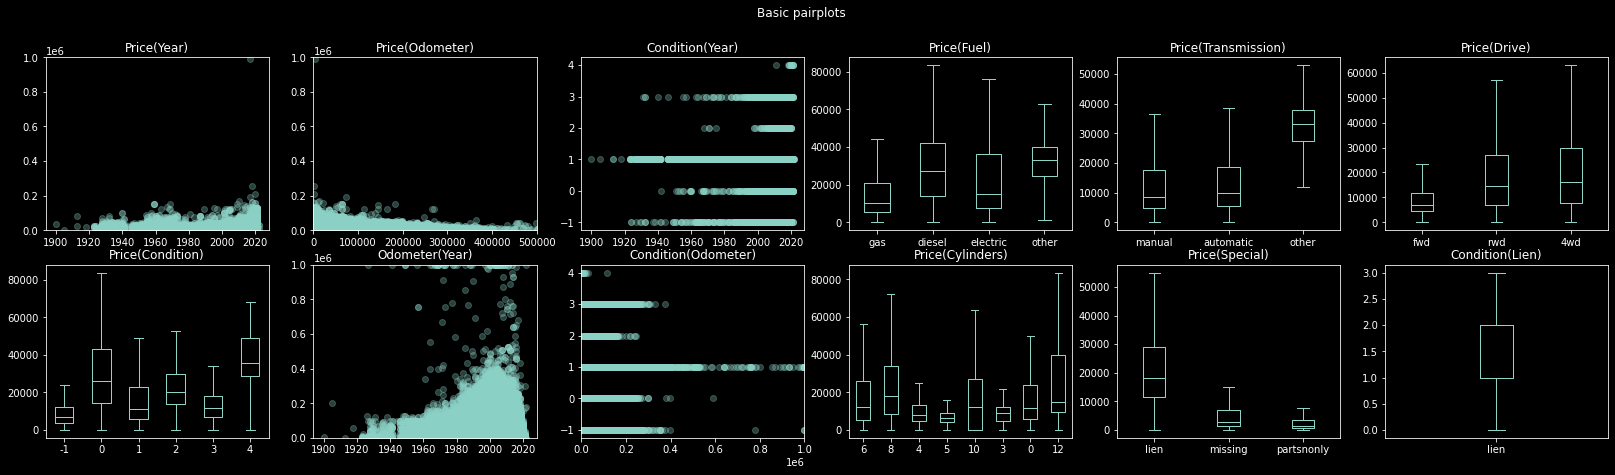

In [267]:
#sns.pairplot took way too long to draw

fig, axs = plt.subplots(2, 6, figsize=(28, 7))
fig.suptitle('Basic pairplots')

axs[0, 0].scatter(dataframe['year'], dataframe['price'], alpha=0.3)
axs[0, 0].set_ylim(0, 1000000)
axs[0, 0].set_title('Price(Year)')

axs[0, 1].scatter(dataframe['odometer'], dataframe['price'], alpha=0.3)
axs[0, 1].set_xlim(0, 500000)
axs[0, 1].set_ylim(0, 1000000)
axs[0, 1].set_title('Price(Odometer)')

axs[0, 2].scatter(dataframe['year'], dataframe['condition'], alpha=0.3)
axs[0, 2].set_title('Condition(Year)')

axs[1, 0].boxplot([dataframe[dataframe['condition']==-1]['price'],
                dataframe[dataframe['condition']==0]['price'],
                dataframe[dataframe['condition']==1]['price'], 
                dataframe[dataframe['condition']==2]['price'],
                dataframe[dataframe['condition']==3]['price'],
                dataframe[dataframe['condition']==4]['price']], 
                labels=[-1, 0, 1, 2, 3, 4],
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[1, 0].set_title('Price(Condition)')

axs[1, 1].scatter(dataframe['year'], dataframe['odometer'], alpha=0.3)
axs[1, 1].set_ylim(0, 1000000)
axs[1, 1].set_title('Odometer(Year)')

axs[1, 2].scatter(dataframe['odometer'], dataframe['condition'], alpha=0.3)
axs[1, 2].set_xlim(0, 1000000)
axs[1, 2].set_title('Condition(Odometer)')

axs[0, 3].boxplot([dataframe[dataframe['gas']==1]['price'],
                dataframe[dataframe['diesel']==1]['price'],
                dataframe[dataframe['electric']==1]['price'], 
                dataframe[dataframe['other']==1]['price']], 
                labels=['gas', 'diesel', 'electric', 'other'],
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[0, 3].set_title('Price(Fuel)')

axs[1, 3].boxplot([dataframe[dataframe['cylinders']==i]['price'] for i in dataframe['cylinders'].unique()], 
                labels=dataframe['cylinders'].unique(),
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[1, 3].set_title('Price(Cylinders)')

axs[0, 4].boxplot([dataframe[dataframe['transmission__manual']==1]['price'],
                dataframe[dataframe['transmission__automatic']==1]['price'],
                dataframe[dataframe['transmission__other']==1]['price']], 
                labels=['manual', 'automatic', 'other'],
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[0, 4].set_title('Price(Transmission)')

axs[0, 5].boxplot([dataframe[dataframe['fwd']==1]['price'],
                dataframe[dataframe['rwd']==1]['price'],
                dataframe[dataframe['4wd']==1]['price']], 
                labels=['fwd', 'rwd', '4wd'],
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[0, 5].set_title('Price(Drive)')

axs[1, 4].boxplot([dataframe[dataframe['lien']==1]['price'],
                dataframe[dataframe['missing']==1]['price'],
                dataframe[dataframe['parts only']==1]['price']], 
                labels=['lien', 'missing', 'partsnonly'],
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[1, 4].set_title('Price(Special)')

axs[1, 5].boxplot(dataframe[dataframe['lien'] == 1]['condition'],
                labels=['lien'],
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
axs[1, 5].set_title('Condition(Lien)')

plt.show()

Values scaled mostly to 1mln miles and $ because these are very high 'threshold' values in reality and to better visualise we can cut out outliers above.

In [268]:
#checking corelations
from scipy import stats

corr = {}

price_year = {}
price_year['pearson'], _ = stats.pearsonr(dataframe['year'], dataframe['price'])
price_year['spearman'], _ = stats.spearmanr(dataframe['year'], dataframe['price'])
price_year['kendall'], _ = stats.kendalltau(dataframe['year'], dataframe['price'])
corr['price_year'] = price_year

price_odometer = {}
price_odometer['pearson'], _ = stats.pearsonr(dataframe['odometer'], dataframe['price'])
price_odometer['spearman'], _ = stats.spearmanr(dataframe['odometer'], dataframe['price'])
price_odometer['kendall'], _ = stats.kendalltau(dataframe['odometer'], dataframe['price'])
corr['price_odometer'] = price_odometer

odometer_year = {}
odometer_year['pearson'], _ = stats.pearsonr(dataframe['year'], dataframe['odometer'])
odometer_year['spearman'], _ = stats.spearmanr(dataframe['year'], dataframe['odometer'])
odometer_year['kendall'], _ = stats.kendalltau(dataframe['year'], dataframe['odometer'])
corr['odometer_year'] = odometer_year

print(corr)

{'price_year': {'pearson': -0.0015602214302658196, 'spearman': 0.5516623300180004, 'kendall': 0.41419753692080824}, 'price_odometer': {'pearson': 0.000689597029173398, 'spearman': -0.5390089790152532, 'kendall': -0.3879972279602579}, 'odometer_year': {'pearson': -0.12802738763653038, 'spearman': -0.5753181858784397, 'kendall': -0.43526710383302386}}


Overall this data looks very sensible and promising. For example: older and higher-mileage cars are cheaper, cars with bigger engines are more expensive, salvage cars are cheaper etc.

- Price(Year) - relation in this dataset reflects real-world situation really well. New cars are more expensive than older ones. But for example 10 year old cars are cheaper than cars from the 70s which are considered classics. My oppinion is confirmed by spearman coreellation measure which points to the fact that price and year are monotonously coreellated. Although by looking at pearson measure we can see that it is not a linear correllation (because of all the fluctuations).

- Price(Odometer) - same as above. Cars with higher mileage are cheaper. Supported by spearman correllation measure.

- Condition(Year) - cars labeled 'new' were built in the last 2 years which is realistic. Other than that we see every condition in most years. Although 'salvage' tends to appear more for older cars. Most cars are in good condition.

- Price(Fuel) - gas cars are the cheapest. Which is realistic - generally gas cars are cheaper than diesel. Electric and 'other' (probably hydrogen) cars are more expensive which is also realistic. Electric cars are relatively popular in contrast to hydrogen (I know of only one model on the market). What is supprising is that there is a lot of very expensive diesel cars, but it is probably because of trucks.

- Price(Transmission) - manual and automatic at simmilar prices. Although automatic cars tend to be a bit more expensive, because it is the transmission of choice in most modern luxury cars. 'other' which probably included transmissions such as automated manual or dual-clutch are the most expensive becouse they are mostly found in sport cars.

- Price(Drive) - this is also realistic. While all the medians are near there is a lot more expensive rear wheel drive cars than front wheel drive cars. This also comes down to the fact that luxury and sporty cars are often rwd. Although 4wd car prices are very simmilar and even a bit more expensive than rwd which is also very realistic since nowadays 4wd cars are preferred by most people.

- Price(Condition) - this plot is a bit ambiguous. Although salvage cars are the cheapest and new cars most expensive. Between this two values the results are varied. It's probably because of the fact that the most important aspects of a car in terms of price are: model, manufacturer, year and mileage.

- Odometer(Year) - this one is very realistic. Although there are some very high mileage carws in all production years (trucks and work cars), we can almost see a normal distribution around the year 2000. Older cars didn't get such large mileages because car technology changed rapidly so people changed cars and also they were less popular. Younger cars didn't get such high mileages becuase they are simply too young. It's supported by the fact that we se it fall drasticly after 2020.

- Condition(Odometer) - very simmillar to Condition(Year) plot. Maybe a bit more realistic. 'New' cars have very low mileage. 'Like New' cars tent to either be enthusiast, rebuilt cars or very well taken care of and then they can get fairly big mileages. Cars in fair condition tend to have simmilar mileage to cars in very good condition because it mostly depends on then owner. Cars in good condition come with all kinds of mileages. While salvage cars tend to be a bit older just like 'like new'.

- Price(Cylinders) - vary realistic. 4 cylinder engines are the golden standard of affordable vechicles. 3cyl engines are mostly found in newer compact cars because they came out of fashion for a long time during the 90s-2000s. There are a few 5cyl engines and almost all of them are found in audis. But not in the highest models rather kind-of sporty compact sedans such as 80 or A4. 6 cylinders are visibly more expensive because they are often found in luxury/sport cars. A lot of people consider 6cyl engines to be the best and smoothest running. 10cyl engines are mostly found in 'budget' entry-level supercars such as audi r8. While new they are very expensive old ones tend to loose value. 12 cylinder engines are very expensive becouse these are very big engines found in very luxorious or sporty cars. Because it is a US dataset 8 cylinder(mostly V8) engine cars are the most expensive. Well it's obvious it's big, iconic, all american classics have it and because of it's cultural significance and sporty capabilities it's still beeing put in cars. Finally we can see that 0cyl (mostly electric) cars also tend to be expensive. 

- Price(Special) - we can see that cars sold for parts and/or with missing parts tend to be very cheap. Also we don't see very expensive cars as lien.

- Condition(Lien) - Lien cars ten to be in fairly good shape - probably became lien because of their owner financial problems.

## B. More complex data aspects

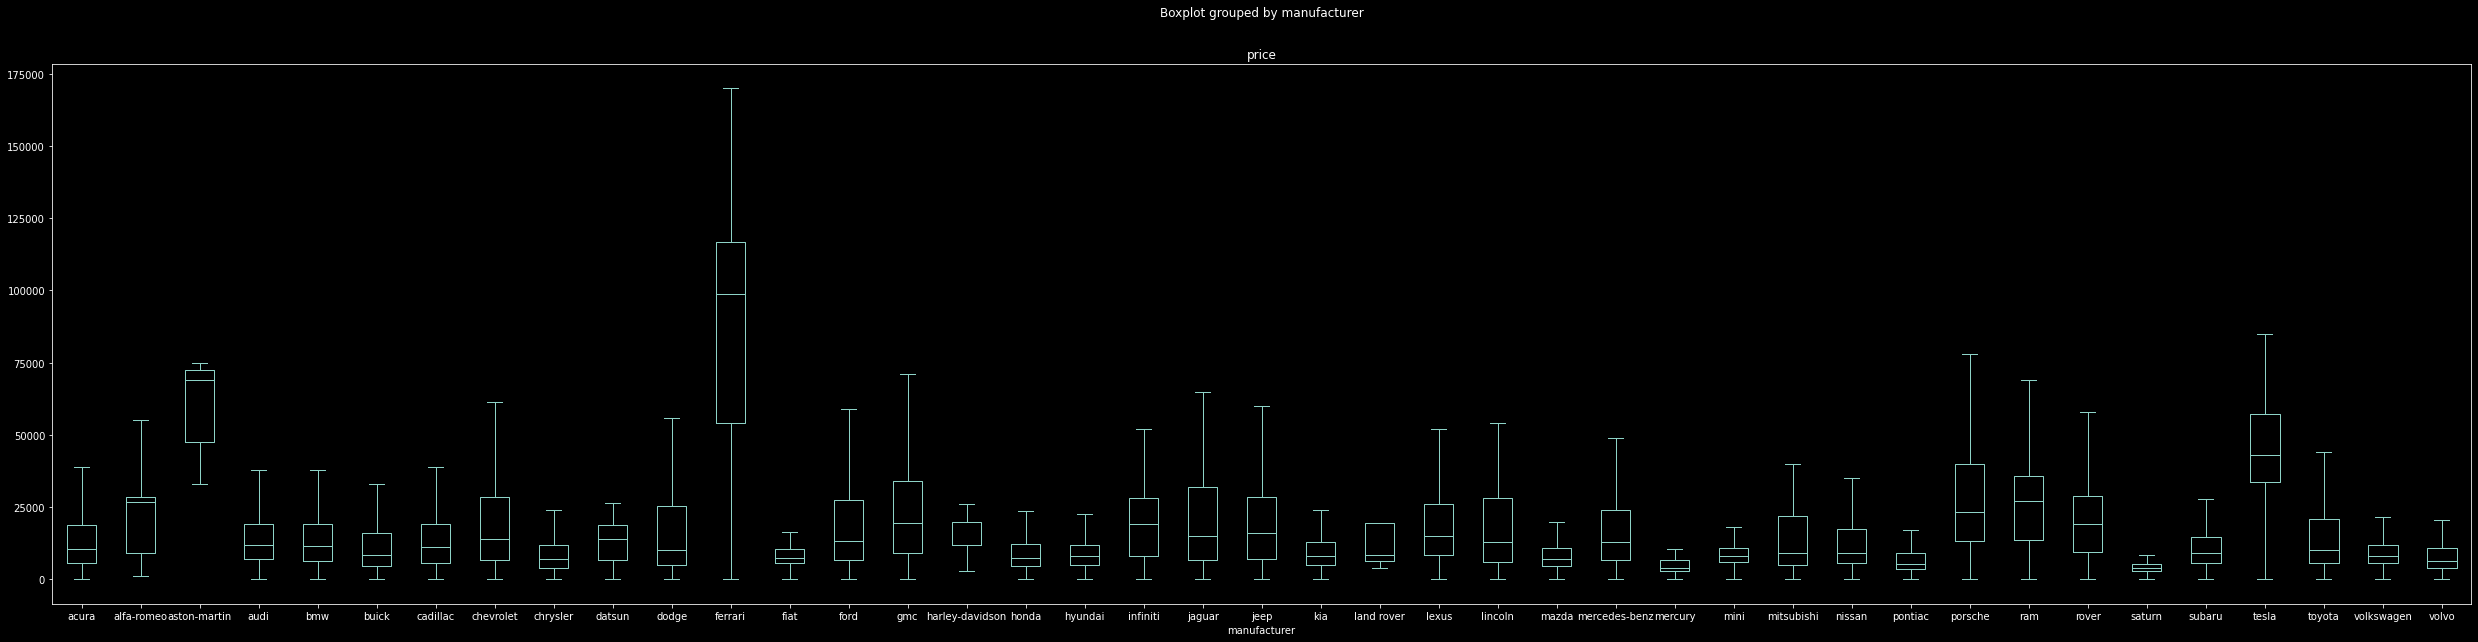

In [269]:
dataframe.boxplot('price', 'manufacturer', figsize=(42, 10), grid=False, color='C0', showfliers=False)
plt.show()

This chart really proves the quality of this data. As we can see all of the car manufacturers have prices associated with them that are very sensible. Volkswagen, fiat or kia are the cheapest while ferrari, porsche, tesla or aston-martin are the most expensive. Audis are simmilairy priced to BMWs, while Mercedes cars are a bit more expensive just like Lexus. It's all very sensible.

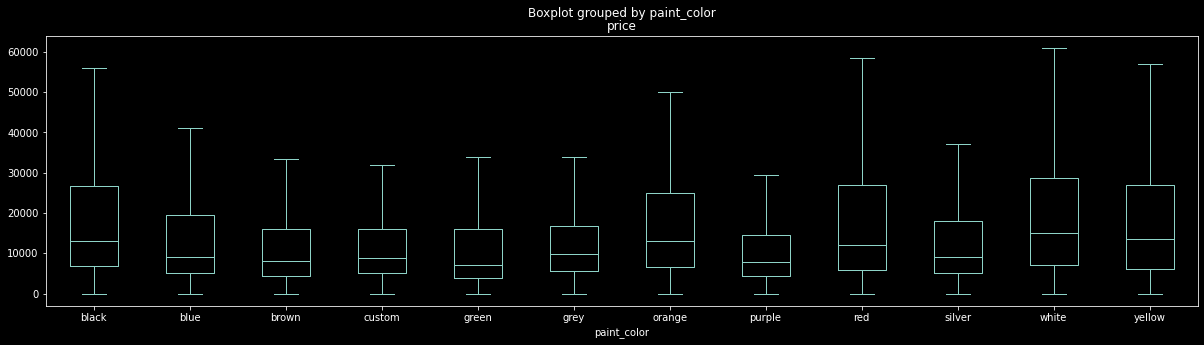

In [270]:
dataframe.boxplot('price', 'paint_color', figsize=(20, 5), grid=False, color='C0', showfliers=False)
plt.show()

Here is an interesting chart. As we can see white and red cars are the most expensive ones, while purple, green or brown the cheapest.

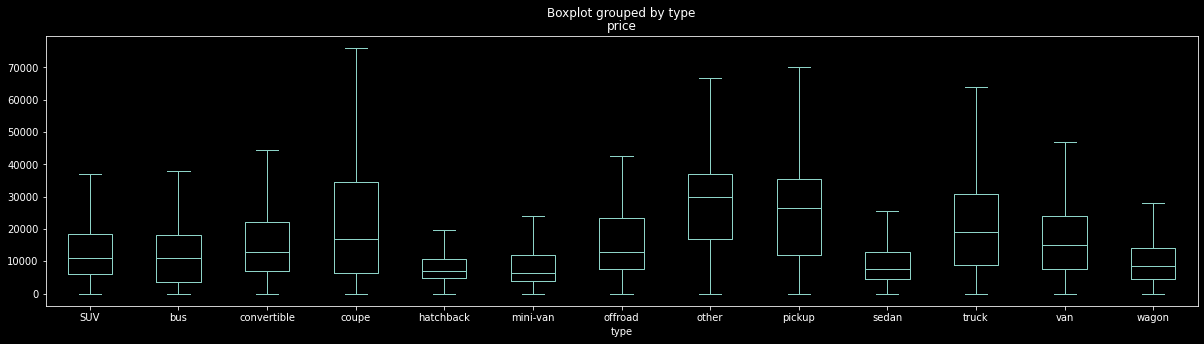

In [271]:
dataframe.boxplot('price', 'type', figsize=(20, 5), grid=False, color='C0', showfliers=False)
plt.show()

Pickups and other tend to be very expensive because of their size, popularity and work potential. Obviously the most expensive cars are sporty coupes while regular sedans and hatchbacks are cheap.

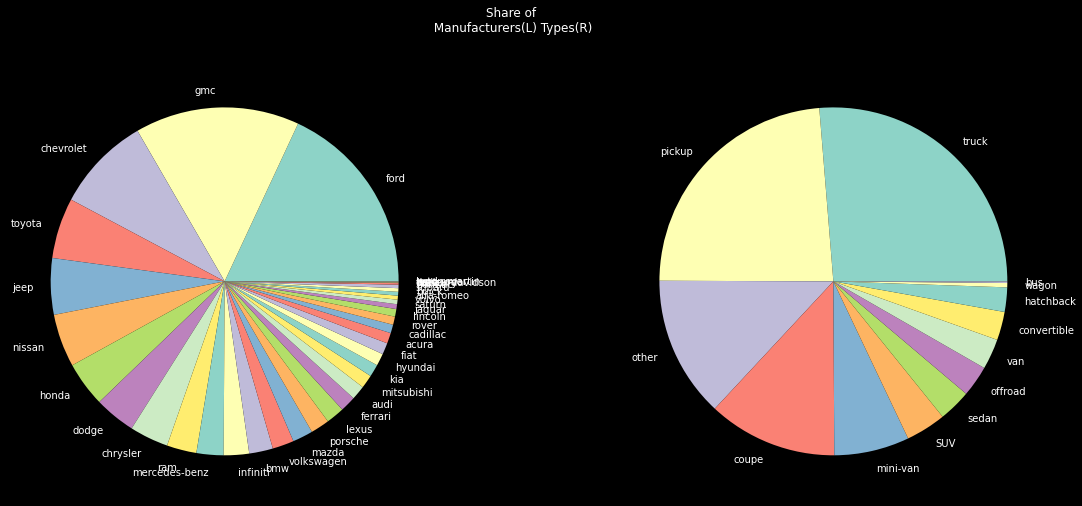

In [272]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Share of\n Manufacturers(L) Types(R)')
axs[0].pie(dataframe['manufacturer'].value_counts(), labels=dataframe['manufacturer'].unique())
axs[1].pie(dataframe['type'].value_counts(), labels=dataframe['type'].unique())
plt.show()

Charts above acn be a bit suprising, but I want to remind that this dataset is collected exclusively in USA where trucks and pickups are VERY popular not only for daily cars but also work. It also explains why most popular manufacturers are ford and gmg followed by imported japanese manufacturers and why european manufacturers are so far behind.

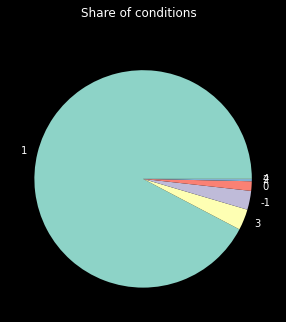

In [273]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
fig.suptitle('Share of conditions')
axs.pie(dataframe['condition'].value_counts(), labels=dataframe['condition'].unique())
plt.show()

Most cars are in good condition followed by: like new and salvage. This explains price graphs ands seems sensible. Also proofs that we didn't mess with the data all that much by filling fair condition cars.

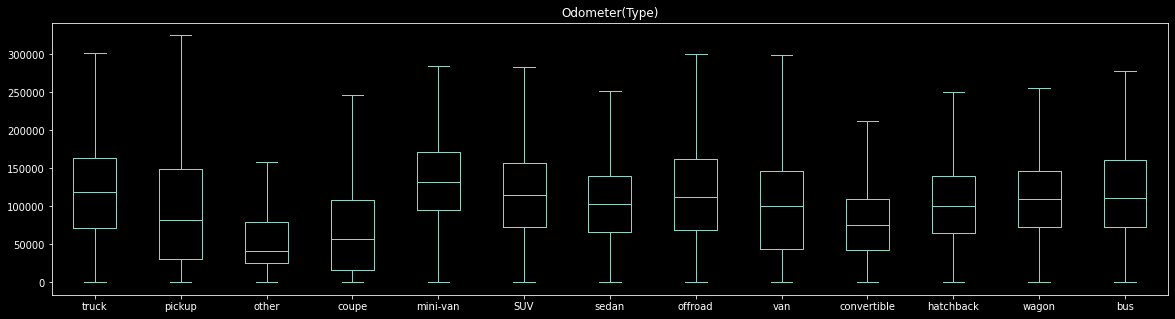

In [274]:
plt.figure(figsize=(20, 5))
plt.title('Odometer(Type)')
plt.boxplot([dataframe[dataframe['type']==i]['odometer'] for i in dataframe['type'].unique()], 
                labels=dataframe['type'].unique(),
                boxprops=dict(color='C0'),
                capprops=dict(color='C0'),
                whiskerprops=dict(color='C0'), 
                medianprops=dict(color='C0'), showfliers=False)
plt.show()

Although this looks preety uniform we can see some rational dependencies eg. coupes as sporty cars get lower mileage than trucks or mini-vans.

In [275]:
x = dataframe.model.unique()
d = {
    'model': [],
    'manufacturer': [],
    'mean_price': []
}
for i in x:
    d['model'].append(i)
    d['manufacturer'].append(dataframe[dataframe.model==i]['manufacturer'].unique()[0])
    d['mean_price'].append(dataframe[dataframe.model==i]['price'].mean())

df = pd.DataFrame(d)
df.nlargest(10, 'mean_price')

,model,manufacturer,mean_price
8934,titan se kingcab,nissan,1.350089e+08
684,f350 super duty lariat,ford,5.294850e+07
69,tundra,toyota,1.176979e+07
2422,sierra 2500,gmc,3.541703e+06
996,regal,buick,2.173853e+06
4290,l-series l200 4dr sedan,saturn,2.000000e+06
5235,amg g 63,mercedes-benz,9.900000e+05
2711,g550 square,mercedes-benz,2.550000e+05
7713,mercedes-maybach s-class,mercedes-benz,2.099950e+05
5489,458 italia,ferrari,1.699990e+05


Sensible output of top 10 most expensive(by mean) models.

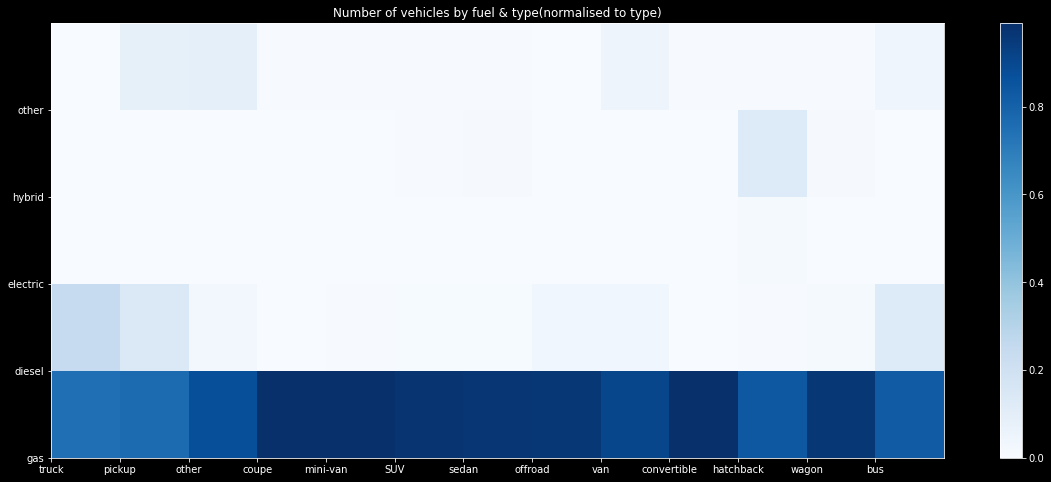

In [276]:
type_labels = []
map_type = {}
fuel_labels = ['gas', 'diesel', 'electric', 'hybrid', 'other']

dummy_df = dataframe[['type', 'gas', 'diesel', 'electric', 'hybrid', 'other']].copy()
dummy_df['fuel'] = np.zeros(len(dataframe['type']))

for i, row in dummy_df.iterrows():
    f = 0
    if (row['gas'] == 1):
        f = 0
    elif (row['diesel'] == 1):
        f = 1
    elif (row['electric'] == 1):
        f = 2
    elif (row['hybrid'] == 1):
        f = 3
    else:
        f = 4
    dummy_df.at[i, 'fuel'] = f

dummy_df = dummy_df.drop(columns=['gas', 'diesel', 'electric', 'hybrid', 'other'], axis=1)
x = dummy_df['type'].unique()
n = 0
for i in x:
    type_labels.append(i)
    map_type[i] = n
    n += 1

dummy_df['type'] = dummy_df['type'].map(lambda x: map_type[x])
plt.figure(figsize=(20, 8))

hist, xedges, yedges = np.histogram2d(dummy_df['type'], dummy_df['fuel'], bins=[np.arange(0, 14, 1), np.arange(0, 6, 1)])
hist = hist.T
with np.errstate(divide='ignore', invalid='ignore'):
    hist /= hist.sum(axis=0, keepdims=True)
plt.pcolormesh(xedges, yedges, hist, cmap=plt.cm.Blues)
plt.xticks(ticks=np.arange(0, 13, 1),labels=type_labels)
plt.yticks(ticks=np.arange(0, 5, 1),labels=fuel_labels)
plt.colorbar()
plt.title('Number of vehicles by fuel & type(normalised to type)')
plt.show()


As we can see gas cars are by far the most popular. A lot of diesel vehicles are pickups and trucks - just as expected. Also there are quite a few diesel buses. Electric and hybrid vehicles are not popular. A lot of hybrid vehicles are hatchbacks probably due to Toyota Prius.

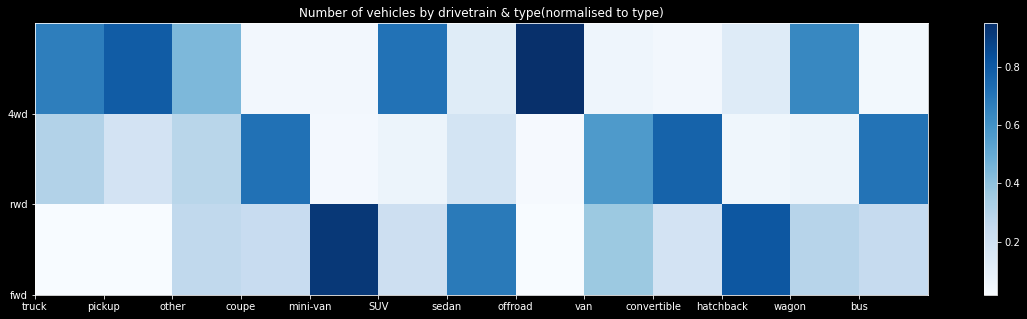

In [277]:
type_labels = []
map_type = {}
drive_labels = ['fwd', 'rwd', '4wd']

dummy_df = dataframe[['type', 'fwd', 'rwd', '4wd']].copy()
dummy_df['drive'] = np.zeros(len(dataframe['type']))

for i, row in dummy_df.iterrows():
    f = 0
    if (row['fwd'] == 1):
        f = 0
    elif (row['rwd'] == 1):
        f = 1
    else:
        f = 2
    dummy_df.at[i, 'drive'] = f

dummy_df = dummy_df.drop(columns=['fwd', 'rwd', '4wd'], axis=1)
x = dummy_df['type'].unique()
n = 0
for i in x:
    type_labels.append(i)
    map_type[i] = n
    n += 1

dummy_df['type'] = dummy_df['type'].map(lambda x: map_type[x])
plt.figure(figsize=(20, 5))

hist, xedges, yedges = np.histogram2d(dummy_df['type'], dummy_df['drive'], bins=[np.arange(0, 14, 1), np.arange(0, 4, 1)])
hist = hist.T
with np.errstate(divide='ignore', invalid='ignore'):
    hist /= hist.sum(axis=0, keepdims=True)
plt.pcolormesh(xedges, yedges, hist, cmap=plt.cm.Blues)
plt.xticks(ticks=np.arange(0, 13, 1),labels=type_labels)
plt.yticks(ticks=np.arange(0, 3, 1),labels=drive_labels)
plt.colorbar()
plt.title('Number of vehicles by drivetrain & type(normalised to type)')
plt.show()

Trucks and pickups are mostly 4wd (some trucks rwd), becuse they are working vehicles. While almost all SUVs are 4wd (although they are daily vehiles they take a lot fro offroad vehicles) and sedans fwd. Most coupes are rwd as they are sporty cars and this drivetrain is considered better for weight distribution. Almost all offroad vehicles are of course 4wd. While most family-oriented hatchbacks and mini-vans are fwd.

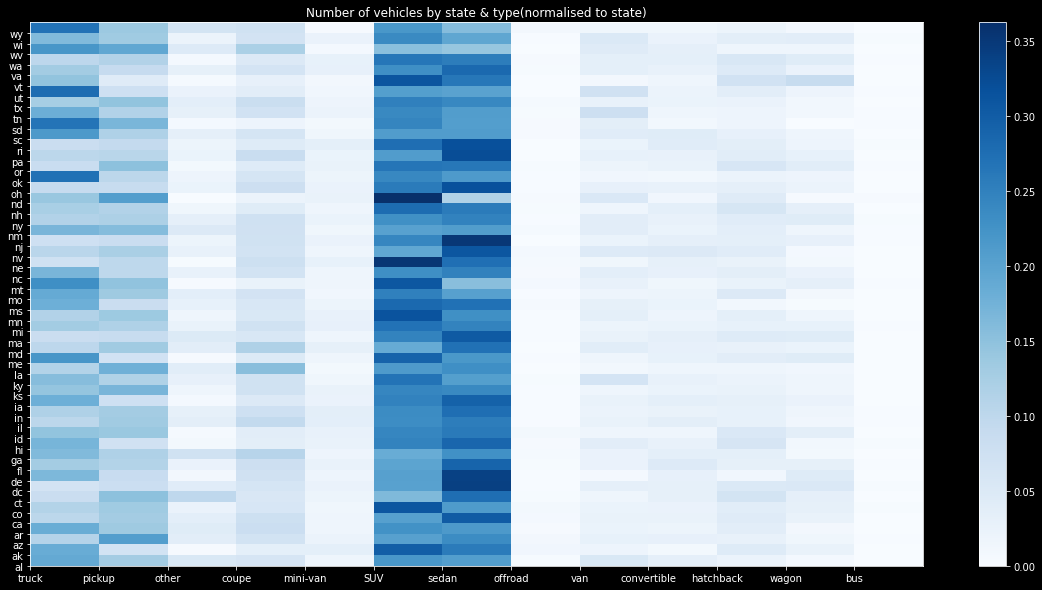

In [278]:
type_labels = []
map_type = {}
map_state = {}
state_labels = []

dummy_df = dataframe[['type', 'state']].copy()

x = dummy_df['type'].unique()
n = 0
for i in x:
    type_labels.append(i)
    map_type[i] = n
    n += 1

dummy_df['type'] = dummy_df['type'].map(lambda x: map_type[x])

x = dummy_df['state'].unique()
n = 0
for i in x:
    state_labels.append(i)
    map_state[i] = n
    n += 1

dummy_df['state'] = dummy_df['state'].map(lambda x: map_state[x])

plt.figure(figsize=(20, 10))

hist, xedges, yedges = np.histogram2d(dummy_df['type'], dummy_df['state'], bins=[np.arange(0, 14, 1), np.arange(0, 52, 1)])
hist = hist.T
with np.errstate(divide='ignore', invalid='ignore'):
    hist /= hist.sum(axis=1, keepdims=True)
plt.pcolormesh(xedges, yedges, hist, cmap=plt.cm.Blues)
plt.xticks(ticks=np.arange(0, 13, 1),labels=type_labels)
plt.yticks(ticks=np.arange(0, 51, 1),labels=state_labels)
plt.colorbar()
plt.title('Number of vehicles by state & type(normalised to state)')
plt.show()

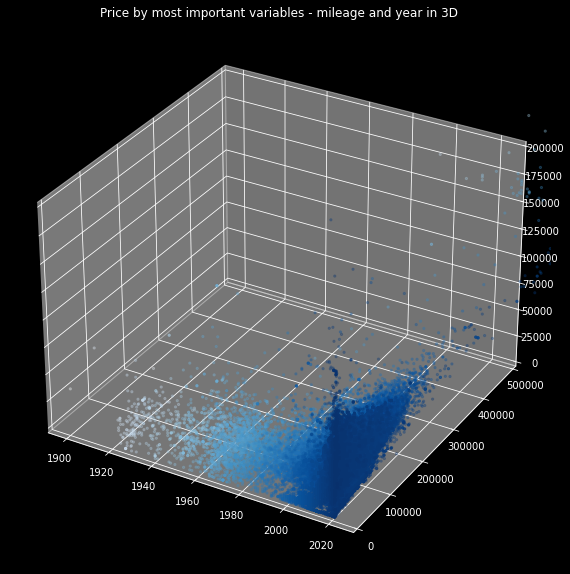

In [279]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 200000)
ax.set_ylim(0, 500000)
ax.scatter(dataframe['year'], dataframe['odometer'], dataframe['price'], cmap=plt.cm.Blues, c=dataframe['year'], s=5, alpha=0.3)
plt.title('Price by most important variables - mileage and year in 3D')
plt.show()

## C. Summary

As presented above this dataset realistically represents current state of US used cars market. Basic properties and relations between different aspects of this data have been pointed out. Especially properties that can be used in price regression or categorising cars by type.

Car manufacturers that are considered expensive are expensive, car types that are popular are popular and prices make sense. We can now go on to build and train some models based on that data. In case of price regression it's easy to notice that most important variables are: odometer and year.

# **III. Price Prediction**

This section will present models for price prediction based on other data features.

In [129]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

## Dataset preparation

First we need to load and further prepare data for specific models.

In [2]:
import numpy as np
import pandas as pd 

In [3]:
dataframe = pd.read_csv('basic_data.csv')

Dropping columns: image_url, description & model. Model is dropped because there is a lot of noise as it's the name of the offer for car.

In [4]:
dataframe.drop(['image_url', 'description', 'model'], axis=1, inplace=True)

Spliting data into target and fetures on which the prediction will be based.

In [5]:
X = dataframe.drop('price', axis=1)
y = pd.DataFrame(dataframe['price'], columns=['price'])

One-Hot encoding columns: manufacturer, type, paint_color & state.

In [6]:
l = ['manufacturer', 'type', 'paint_color', 'state']
dummy_df = pd.get_dummies(X[l])
X = pd.concat([X, dummy_df], axis=1)
X.drop(l, axis=1, inplace=True)

Converting to numpy arrays.

In [7]:
Xarray = X.to_numpy()
yarray = y.to_numpy()
yarray = np.concatenate(yarray, axis=0)

Data is split into train and test. Test is 20% of all data.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xarray, yarray, test_size=0.2, random_state=0)

Here we use SciKit's StandardScaler to scale the data.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Splitting data into batches (<100 data points in batch).

In [10]:
N_batches = 1024
X_trainSet = np.array_split(X_train_scaled, N_batches)
y_trainSet = np.array_split(y_train, N_batches)

## A. Polynomial Regression with ElasticNet regularization using SGD

The simplest model that we fit for price prediction is the one below. It's a polynomial regression with elasticnet regularization. It's trained in batches using stochastic gradient descent. I couldn't fit this model on the whole dataset at once because of it's size and RAM limitations. I'm using SGDRegressor because of the limited oprions for out-of-memory learning in sklearn. I didn't opt for KFold because while it would be possible it wolud take a lot more time and I don't have high hopes for this model either way. Due to the large feature-space this kind of regression gives really poor results, aside from that any polynomial features above degree 5 are impossible as they would need TiBs of RAM.

In [333]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Training parameters
epochs = 10
degrees = [1, 2]
alphas = [0.01, 0.1, 1, 2, 5]

#Results table for later visualization
results = []

#DIY Gradient Search
for d in degrees:
    results_d = []
    for a in alphas:
        results_a = []
        model = SGDRegressor(penalty='elasticnet', alpha=a)
        poly = PolynomialFeatures(degree=d)

        results_a.append(list())
        results_a.append(list())

        print('----------')
        print('alpha, degree: ', a, ' ', d)

        for k in range(epochs): #Epoch
            print('-', end='')
            for i in range(N_batches): #Batch
                X_batch, y_batch = X_trainSet[i], y_trainSet[i]

                X_batchp = poly.fit_transform(X_batch)
                model.partial_fit(X_batchp, y_batch)

            X_testp = poly.transform(X_test_scaled)
            testp = model.predict(X_testp)
            r2 = r2_score(y_test, testp)
            mse = mean_squared_error(y_test, testp)
            results_a[0].append(r2)
            results_a[1].append(mse)

        results_d.append(results_a)
        print('\n')
    results.append(results_d)

----------
alpha, degree:  0.01   1
----------

----------
alpha, degree:  0.1   1
----------

----------
alpha, degree:  1   1
----------

----------
alpha, degree:  2   1
----------

----------
alpha, degree:  5   1
----------

----------
alpha, degree:  0.01   2
----------

----------
alpha, degree:  0.1   2
----------

----------
alpha, degree:  1   2
----------

----------
alpha, degree:  2   2
----------

----------
alpha, degree:  5   2
----------



In [334]:
resultsp = []
for d in range(len(degrees)):
    resultsp.append(list())
    for i in range(4):
        resultsp[d].append(list())
    for a in range(len(alphas)):
        resultsp[d][0].append(np.average(results[d][a][0]))
        resultsp[d][1].append(np.average(results[d][a][1]))
        resultsp[d][2].append(np.max(results[d][a][0]))
        resultsp[d][3].append(np.min(results[d][a][1]))

print('Average R2')
print(' ', *alphas, sep='\t\t\t')
print(degrees[0], *resultsp[0][0], sep='\t')
print(degrees[1], *resultsp[1][0], sep='\t')
print('Average MSE')
print(' ', *alphas, sep='\t\t\t')
print(degrees[0], *resultsp[0][1], sep='\t')
print(degrees[1], *resultsp[1][1], sep='\t')
print('Max R2')
print(' ', *alphas, sep='\t\t\t')
print(degrees[0], *resultsp[0][2], sep='\t')
print(degrees[1], *resultsp[1][2], sep='\t')
print('Min MSE')
print(' ', *alphas, sep='\t\t\t')
print(degrees[0], *resultsp[0][3], sep='\t')
print(degrees[1], *resultsp[1][3], sep='\t')

Average R2
 			0.01			0.1			1			2			5
1	-4385485987003.302	-1136404318023.0024	0.3843040596632329	0.3448146103061041	0.2553247222145674
2	-8.109681574513263e+20	-2.147311967161366e+20	-8.26842490062162e+19	-6.7961646978557395e+19	-2.6452353990437655e+19
Average MSE
 			0.01			0.1			1			2			5
1	8.61077531274211e+20	2.231297118707454e+20	120890122.98563692	128643762.52856979	146214844.07807517
2	1.5923125989445757e+29	4.216185145815323e+28	1.6234813934081083e+28	1.334407346757947e+28	5.193843450412382e+27
Max R2
 			0.01			0.1			1			2			5
1	-859347510146.7488	-19027959452.023155	0.38517655857045363	0.34564579960134767	0.2570520085297511
2	-2.7995818860105613e+20	-1.5089888843758607e+20	-5.165367570363414e+19	-5.0500682388549255e+19	-1.5699111128928367e+19
Min MSE
 			0.01			0.1			1			2			5
1	1.6873040633066278e+20	3.7360849856887014e+18	120718810.34040323	128480560.90656236	145875696.38942915
2	5.496898328143282e+28	2.9628561740455458e+28	1.0142050319605857e+28	9.915663405984191e+27	3.08

As we can see the best results both in terms of MSE and R2 were achieved using linear regression with alpha = 1. R2 is arund 0.38.

## B. SVM

Now we fit support vector machine with linear kernel on this dataset. I chose linear kernel, because this dataset has a lot of features and high dimensional sets tend to be lineary separable. Also I've experimented with RBF and polynomial kernel on parts of this dataset and the results were much worse than linear. Also, coming back to data analisys we can see that this data seems linearly separable, maybe a logarithimic function would be a better fit for some feature pairs but in general it seems that a linear one is a good approximation. Data is scaled via logarithmic function to avoid negative results and boost accuracy.

In [19]:
#trained only on 1/5 of training set because of calculation time
from sklearn.svm import SVR

svm=SVR(kernel='linear', C=0.1, epsilon=0.2)
svm.fit(X_train_scaled[:50000], np.log1p(y_train[:50000]))

SVR(C=0.1, epsilon=0.2, kernel='linear')

Due to size of this dataset and limited capabilites of my laptop (didnt' use Collab because uploading dataset kept crashing) I omitted using grid search and hand tuned hyperparameters by trial and error and hours of training one by one.

In [20]:
from sklearn.metrics import r2_score
p_test = np.expm1(svm.predict(X_test_scaled))
print(r2_score(y_test, p_test))

0.5858067100441813


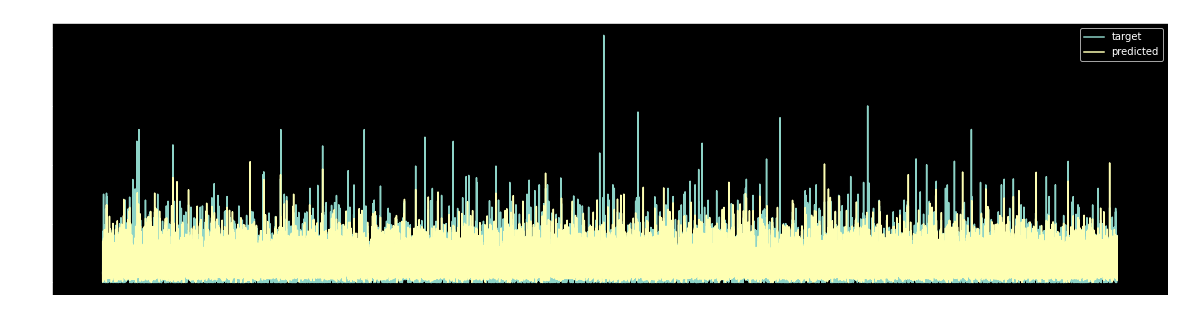

In [21]:
import matplotlib.pyplot as plt
ax = range(len(y_test))
plt.figure(figsize=(20,5))
plt.title('Results on test')
plt.plot(ax, y_test, label='target')
plt.plot(ax, p_test, label='predicted')
plt.legend(loc='best', fancybox=True)
plt.show()

As we can see SVM got us decent results as expected. It handles noisy data and outliers (which are a big problem by the nature of this dataset) much better than regression. Although it's not that suitable for big datasets and takes a long time. Using logarithmic scale also helped a lot.

## C. Gradient Boosting

Here we fit a gradient boosting model to our data. I chose HistGradientBoostingRegressor because it is designed for bigger datasets.

In [115]:
from sklearn.ensemble import HistGradientBoostingRegressor
reg = HistGradientBoostingRegressor(max_iter=400)
reg.fit(X_train_scaled, np.log1p(y_train))

HistGradientBoostingRegressor(max_iter=400)

In [116]:
p_test = np.expm1(reg.predict(X_test_scaled))
print(r2_score(y_test, p_test))

0.5015990780460585


Although it still gave us pretty good results they are suprisingly worse than SVM's. Logarithmic scale helped a lot.

## D. Neural Network

Let's now try to build a neural network and get the best possible error.

In [276]:
from tensorflow import keras

In [277]:
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.0001
    drop = 0.5
    epochs_drop = 20.0
    lrate = initial_lrate * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lrate

In [278]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout

model = Sequential()

model.add(Dense(135, input_shape=(X_train_scaled.shape[1],), activation="relu"))
model.add(BatchNormalization())

model.add(Dense(300, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(100, use_bias=False, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(50, use_bias=False, activation="relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(25, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(1, activation="relu"))
model.compile(loss="mean_absolute_error", optimizer="Adam")

In [279]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 135)               18360     
                                                                 
 batch_normalization_121 (Ba  (None, 135)              540       
 tchNormalization)                                               
                                                                 
 dense_152 (Dense)           (None, 300)               40800     
                                                                 
 batch_normalization_122 (Ba  (None, 300)              1200      
 tchNormalization)                                               
                                                                 
 dense_153 (Dense)           (None, 100)               30000     
                                                                 
 dropout_112 (Dropout)       (None, 100)             

In [280]:
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

history = History()
lrate = LearningRateScheduler(step_decay)
model.fit(X_train_scaled, np.log1p(y_train), validation_data=(X_test_scaled, np.log1p(y_test)), batch_size=32, epochs=100, callbacks=[lrate, history])

Epoch 1/100
2983/2983 [==============================] - 6s 2ms/step - loss: 4.6469 - val_loss: 2.6725 - lr: 1.0000e-04
Epoch 2/100
2983/2983 [==============================] - 6s 2ms/step - loss: 2.3576 - val_loss: 1.5728 - lr: 1.0000e-04
Epoch 3/100
2983/2983 [==============================] - 7s 2ms/step - loss: 1.7001 - val_loss: 1.2594 - lr: 1.0000e-04
Epoch 4/100
2983/2983 [==============================] - 6s 2ms/step - loss: 1.3928 - val_loss: 1.1478 - lr: 1.0000e-04
Epoch 5/100
2983/2983 [==============================] - 5s 2ms/step - loss: 1.2965 - val_loss: 1.1237 - lr: 1.0000e-04
Epoch 6/100
2983/2983 [==============================] - 5s 2ms/step - loss: 1.2479 - val_loss: 1.0374 - lr: 1.0000e-04
Epoch 7/100
2983/2983 [==============================] - 5s 2ms/step - loss: 1.2207 - val_loss: 0.9649 - lr: 1.0000e-04
Epoch 8/100
2983/2983 [==============================] - 6s 2ms/step - loss: 1.1880 - val_loss: 0.9976 - lr: 1.0000e-04
Epoch 9/100
2983/2983 [=================

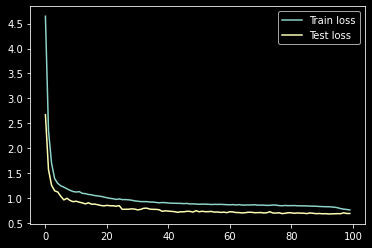

In [281]:
plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Test loss")

plt.legend()
plt.show()

In [282]:
print(r2_score(y_test, np.expm1(model.predict(X_test_scaled))))

746/746 [==============================] - 0s 484us/step
0.6734393606690529


Neural network turned out to be the best solution beeing able to achieve the smallest MSE, MAE and R2 while keeping the training time relatively short. On this size of dataset with a large amount of features and noise neural networks are superior to simpler methods.

## E. Summary

# **IV. Type categorising**

## Dataset preparation

## A. K-Means

## B. Random-Forest

## C. Gradient Boosting

## D. Neural Network

## E. Summary

# **V. Results**

# **VI. Further**

- More interesting models (feature extraction from images or descriptions)
- Better qualitiy of model measures